
Correlation Coefficient Matrix:
                age       job   marital  education   default   balance  \
age        1.000000 -0.021500 -0.381485  -0.121613 -0.017885  0.083820   
job       -0.021500  1.000000  0.069390   0.170160  0.008324  0.009797   
marital   -0.381485  0.069390  1.000000   0.102714 -0.020745  0.024971   
education -0.121613  0.170160  0.102714   1.000000 -0.010534  0.057725   
default   -0.017885  0.008324 -0.020745  -0.010534  1.000000 -0.070886   
balance    0.083820  0.009797  0.024971   0.057725 -0.070886  1.000000   
housing   -0.193888 -0.128353 -0.029851  -0.087070  0.006881 -0.050227   
loan      -0.011250 -0.040245 -0.045210  -0.054086  0.063994 -0.071349   
contact    0.015161 -0.074068 -0.068236  -0.110554  0.008448 -0.009665   
day       -0.017853  0.012865  0.008794   0.014926 -0.013261 -0.008677   
month     -0.040714 -0.096613 -0.035855  -0.050086  0.014297  0.023113   
duration  -0.002367 -0.006739  0.006619  -0.014878 -0.011615 -0.015950   
campa

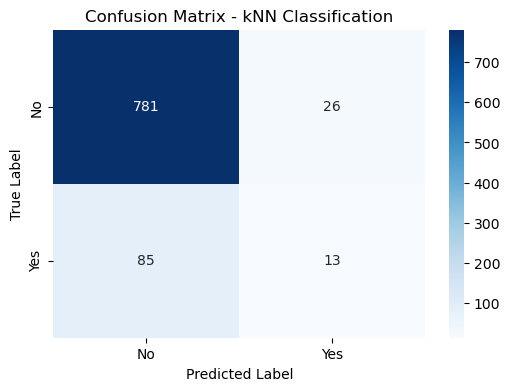

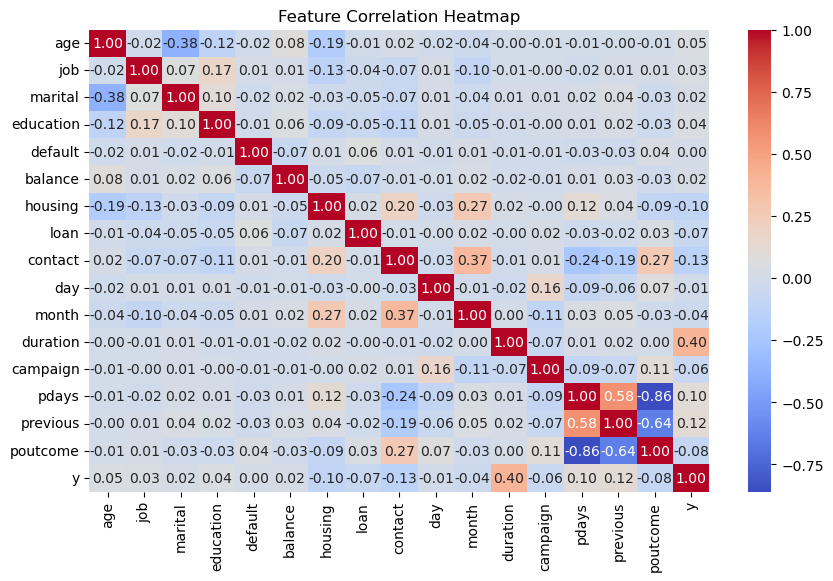

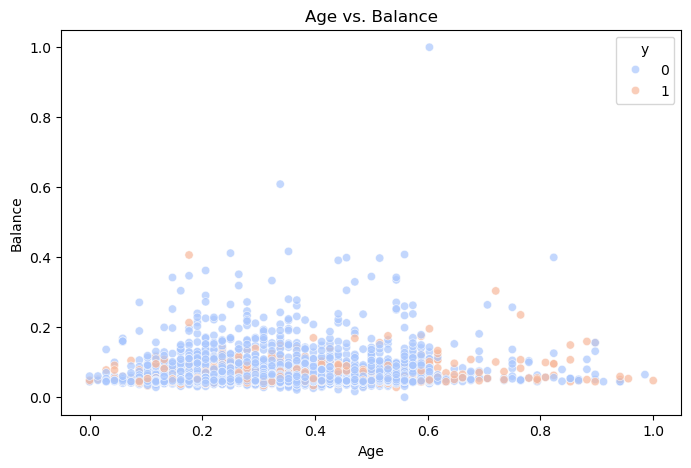

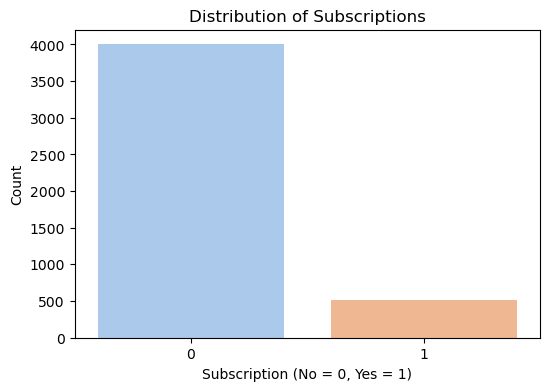

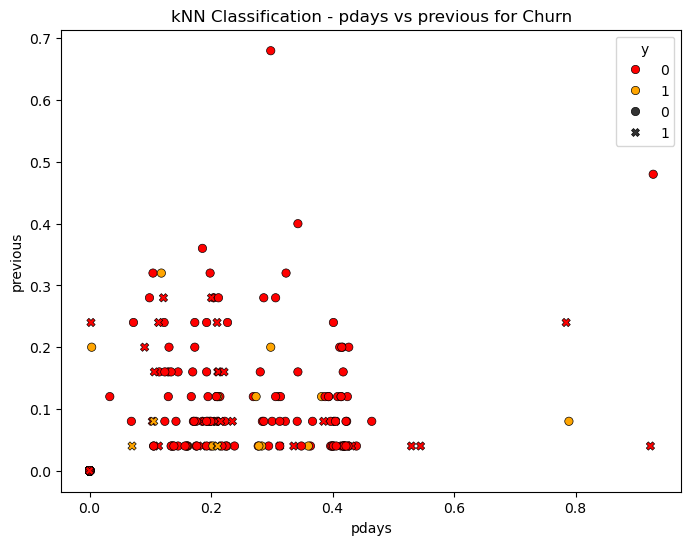

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the bank dataset
file_path = "~/Downloads/bank.csv" # I wanted a challenge and this one really was, but is going to help me with my work!

bank_df = pd.read_csv(file_path, delimiter=';')  #delimiter solution!


# Encode categorical variables using LabelEncoder from sklearn
label_encoders = {}
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_cols:
    le = LabelEncoder()
    bank_df[col] = le.fit_transform(bank_df[col])
    label_encoders[col] = le  # Store encoder 

# Normalize numerical features using Min-Max Scaling
scaler = MinMaxScaler()
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
bank_df[numerical_cols] = scaler.fit_transform(bank_df[numerical_cols])


# correlation matrix
corr_matrix = bank_df.corr()
print("\nCorrelation Coefficient Matrix:")
print(corr_matrix)

# Split the dataset into features (X) and target variable (y)
X = bank_df.drop(columns=['y'])  # Features
y = bank_df['y']  # Target variable (0 = no, 1 = yes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split into training (80%) and testing (20%)

# Train the kNN model with k=5
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
print("Prediction =", y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - kNN Classification")
plt.show()

##Heat Map
plt.figure(figsize=(10, 6))
sns.heatmap(bank_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

##scatter plot comparison and easy to find outliers in dataset
plt.figure(figsize=(8, 5))
sns.scatterplot(x=bank_df["age"], y=bank_df["balance"], hue=bank_df["y"], palette="coolwarm", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Age vs. Balance")

plt.show()

##bar graph based on yes and no from the target variable 
plt.figure(figsize=(6, 4))
sns.countplot(data=bank_df, x="y", hue="y", palette="pastel", legend=False)  
plt.xlabel("Subscription (No = 0, Yes = 1)")
plt.ylabel("Count")
plt.title("Distribution of Subscriptions")
plt.show()


#scatter plot for the most impacted variables with correct predictions on the classifier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_test["pdays"],
    y=X_test["previous"],
    hue=y_pred,  # Predicted churn classification (0 or 1)
    style=y_test,  # Actual labels (different markers)
    palette={0: "red", 1: "orange"},
    edgecolor="black"
)
plt.xlabel("pdays")
plt.ylabel("previous")
plt.title("kNN Classification - pdays vs previous for Churn")

plt.show()